# The EEG Brainwave Dataset contains electronic brainwave signals from an EEG headset and is in temporal format.

The challenge is: Can we predict emotional sentiment from brainwave readings?

Import Packages

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

import os

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Machine_learning/PROJECTS/EEG_Emotion_detection/emotions.csv')

In [9]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [10]:
data.shape

(2132, 2549)

In [11]:
data.dtypes

# mean_0_a    float64
mean_1_a      float64
mean_2_a      float64
mean_3_a      float64
mean_4_a      float64
               ...   
fft_746_b     float64
fft_747_b     float64
fft_748_b     float64
fft_749_b     float64
label          object
Length: 2549, dtype: object

In [ ]:
#Descriptive Statistics

In [12]:
data.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


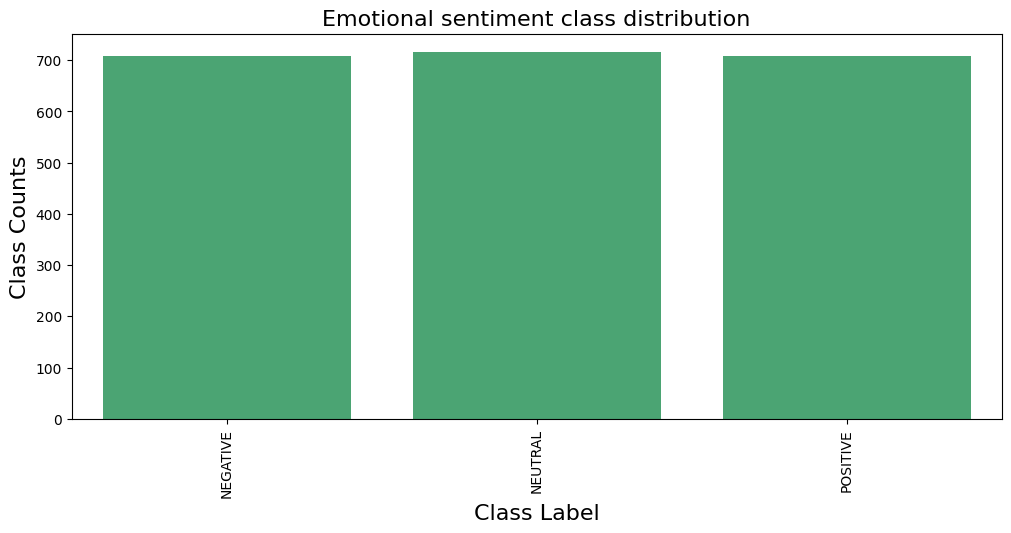

In [13]:
# class distribution
plt.figure(figsize=(12,5))
sns.countplot(x=data.label, color='mediumseagreen')
plt.title('Emotional sentiment class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

# Correlation Between Attributes
Correlation refers to the relationship between two variables and how they may or may not change together.
The most common method for calculating correlation is Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all.

In [14]:
# Split the dataset into X and y
X = data.drop('label', axis=1)
y = data['label']

In [15]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
correlations = data.corr(method='pearson')
correlations

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
# mean_0_a,1.000000,0.176578,0.429810,0.582697,0.178432,-0.000665,0.105961,-0.061046,0.135370,0.008472,...,0.301672,-0.245671,0.204764,0.204764,-0.245671,0.268983,-0.220566,0.196653,0.196653,-0.220566
mean_1_a,0.176578,1.000000,-0.007202,0.571530,0.385041,-0.088608,-0.007586,-0.050463,-0.119391,-0.017197,...,0.130717,-0.047208,0.002549,0.002549,-0.047208,0.153244,-0.096173,0.069532,0.069532,-0.096173
mean_2_a,0.429810,-0.007202,1.000000,0.081567,-0.095696,0.015122,0.014605,-0.004320,0.055625,-0.003564,...,0.699461,-0.742275,0.622567,0.622567,-0.742275,0.674195,-0.728296,0.565044,0.565044,-0.728296
mean_3_a,0.582697,0.571530,0.081567,1.000000,0.220842,-0.117748,0.124462,-0.175592,-0.001782,0.017110,...,0.133720,-0.067460,0.048202,0.048202,-0.067460,0.103294,-0.061376,0.051216,0.051216,-0.061376
mean_4_a,0.178432,0.385041,-0.095696,0.220842,1.000000,-0.017196,-0.007570,0.025546,-0.033443,-0.020361,...,-0.043602,0.069458,-0.090163,-0.090163,0.069458,-0.039620,0.056452,-0.016933,-0.016933,0.056452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fft_745_b,0.268983,0.153244,0.674195,0.103294,-0.039620,0.024944,-0.043387,0.098389,-0.022019,-0.003329,...,0.458558,-0.431711,0.415781,0.415781,-0.431711,1.000000,-0.938696,0.834622,0.834622,-0.938696
fft_746_b,-0.220566,-0.096173,-0.728296,-0.061376,0.056452,0.002976,-0.001477,-0.061713,0.005671,-0.005395,...,-0.493145,0.531019,-0.459876,-0.459876,0.531019,-0.938696,1.000000,-0.815108,-0.815108,1.000000
fft_747_b,0.196653,0.069532,0.565044,0.051216,-0.016933,-0.017169,0.003350,0.149472,-0.040408,0.003422,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108
fft_748_b,0.196653,0.069532,0.565044,0.051216,-0.016933,-0.017169,0.003350,0.149472,-0.040408,0.003422,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108


In [17]:
y.shape

(2132,)

In [18]:
y

0       NEGATIVE
1        NEUTRAL
2       POSITIVE
3       POSITIVE
4        NEUTRAL
          ...   
2127     NEUTRAL
2128    POSITIVE
2129    NEGATIVE
2130    NEGATIVE
2131     NEUTRAL
Name: label, Length: 2132, dtype: object

In [19]:
X.shape

(2132, 2548)

# RandomForest Classifier
RandomForest is a tree & bagging approach-based ensemble classifier. It will automatically reduce the number of features by its probabilistic entropy calculation approach.

In [20]:
label_df = data['label']

In [21]:
# Make a copy of the original dataframe
data_copy = data.copy()

# Drop the label column from the copy
data_copy.drop('label', axis=1, inplace=True)

# Rename the copy
data_no_label = data_copy


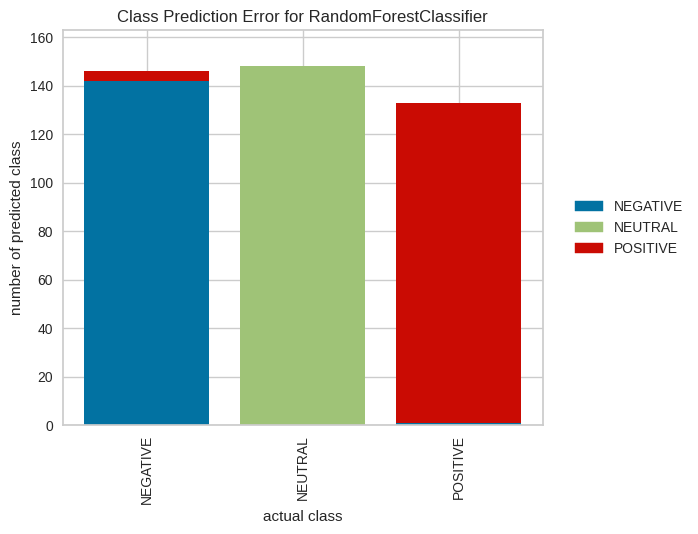

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from yellowbrick.classifier import ClassPredictionError

# Load dataset and encode categorical variables
encoder = LabelEncoder()
label_df = encoder.fit_transform(label_df)

# Scale input features to non-negative values
scaler = MinMaxScaler()
brainwave_df = scaler.fit_transform(data_no_label)

# Define the classes for the visualizer
classes = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(brainwave_df, label_df, test_size=0.2, random_state=42)

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(RandomForestClassifier(n_estimators=10), classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof()


In [24]:
# Evaluate the model using cross-validation
pl_random_forest = Pipeline(steps=[('random_forest', RandomForestClassifier())])
scores = cross_val_score(pl_random_forest, brainwave_df, label_df, cv=10, scoring='accuracy')
print('Accuracy for RandomForest:', scores.mean())

Accuracy for RandomForest: 0.9868698170330393


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(brainwave_df, label_df, test_size=0.2, random_state=42)

# Fit the random forest model
pl_random_forest.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = pl_random_forest.predict(X_test)




In [27]:
# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       1.00      1.00      1.00       148
           2       0.99      0.99      0.99       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



In [28]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[141   0   2]
 [  0 148   0]
 [  2   0 134]]


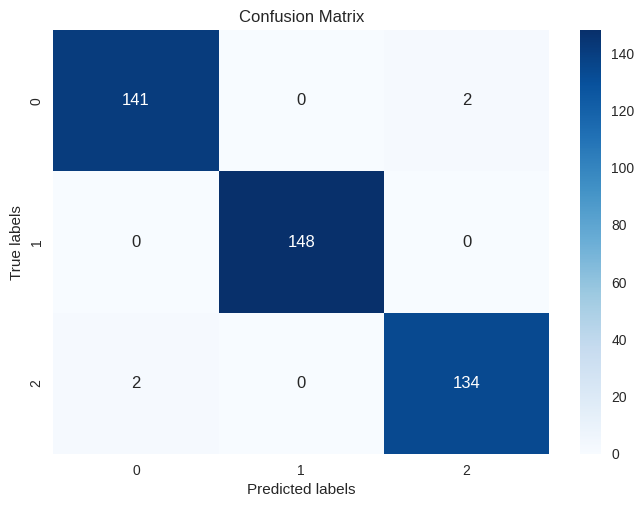

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already defined y_true and y_pred
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Logistic Regression Classifier
Logistic Regression is a linear classifier and works in same way as linear regression.

In [30]:
%%time

pl_log_reg = Pipeline(steps=[('scaler',StandardScaler()),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression: ', scores.mean())

Accuracy for Logistic Regression:  0.9319972796279232
CPU times: user 3min 41s, sys: 1.28 s, total: 3min 42s
Wall time: 3min 46s


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(brainwave_df, label_df, test_size=0.2, random_state=42)

# Fit the pipeline
pl_log_reg.fit(X_train, y_train)

# Predict the test set labels
y_pred = pl_log_reg.predict(X_test)



In [35]:
# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.93       143
           1       0.99      0.99      0.99       148
           2       0.97      0.86      0.91       136

    accuracy                           0.95       427
   macro avg       0.95      0.94      0.94       427
weighted avg       0.95      0.95      0.95       427

Confusion Matrix:
 [[141   0   2]
 [  0 146   2]
 [ 18   1 117]]


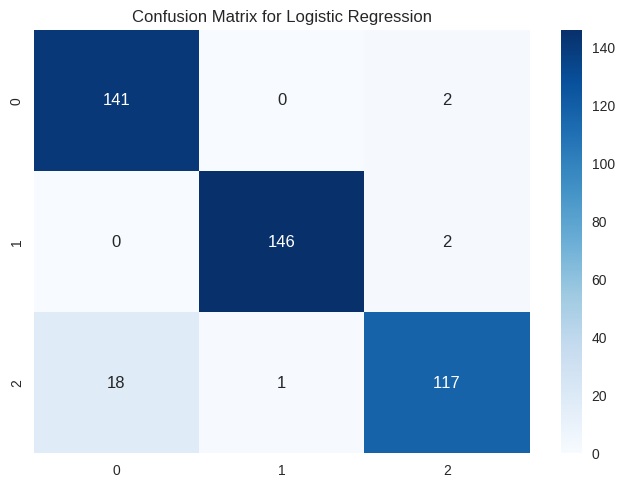

In [36]:
# Generate heatmap for confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()
